<a href="https://colab.research.google.com/github/karthik40121/OIB-SIP/blob/main/PROJECT_3_PROPOSAL_LEVEL_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving AB_NYC_2019.csv to AB_NYC_2019.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['AB_NYC_2019.csv']))
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.isnull().sum()


,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [ ]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
df['name'] = df['name'].fillna("No Name Listed")
df['host_name'] = df['host_name'].fillna("Unknown Host")


In [ ]:
print("Duplicates found:", df.duplicated().sum())


Duplicates found: 0


In [ ]:
df = df.drop_duplicates()
print("Rows after removal:", len(df))


Rows after removal: 48895


In [ ]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')


In [ ]:
df['neighbourhood_group'] = df['neighbourhood_group'].str.title()


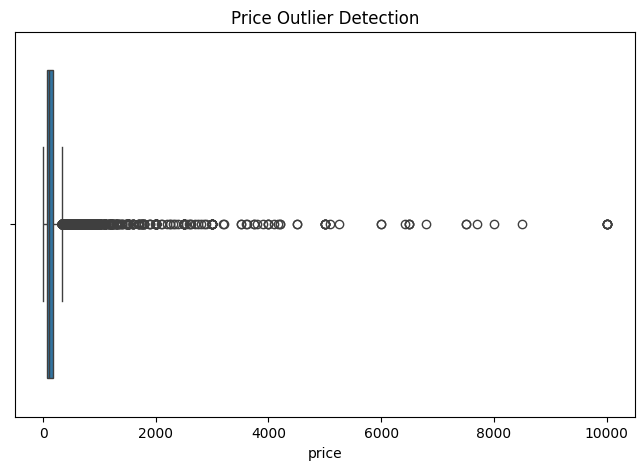

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['price'])
plt.title("Price Outlier Detection")
plt.show()


In [ ]:
df = df[df['price'] < 1000]  # Filter listings over $1000


In [ ]:
df = df[(np.abs(zscore(df['price'])) < 3)]


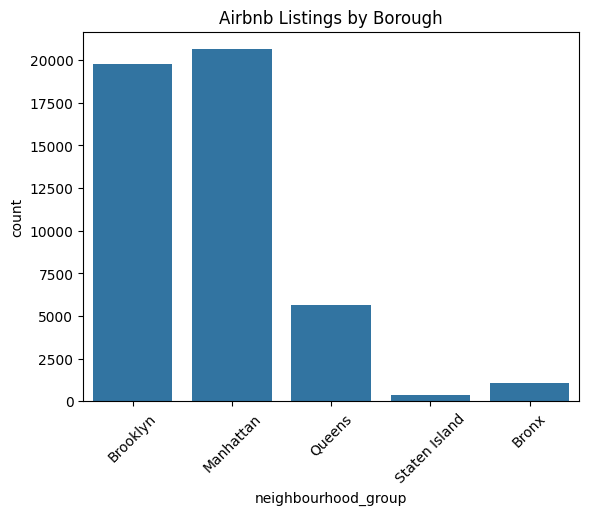

In [ ]:
sns.countplot(x="neighbourhood_group", data=df)
plt.title("Airbnb Listings by Borough")
plt.xticks(rotation=45)
plt.show()


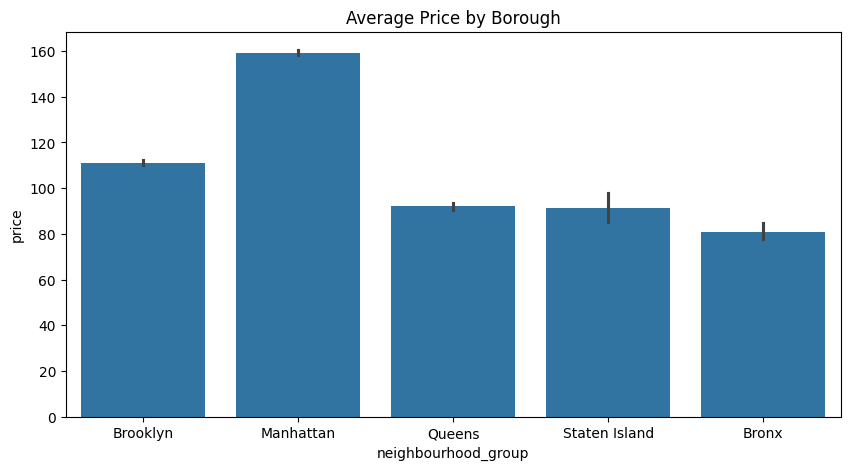

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x="neighbourhood_group", y="price", data=df)
plt.title("Average Price by Borough")
plt.show()


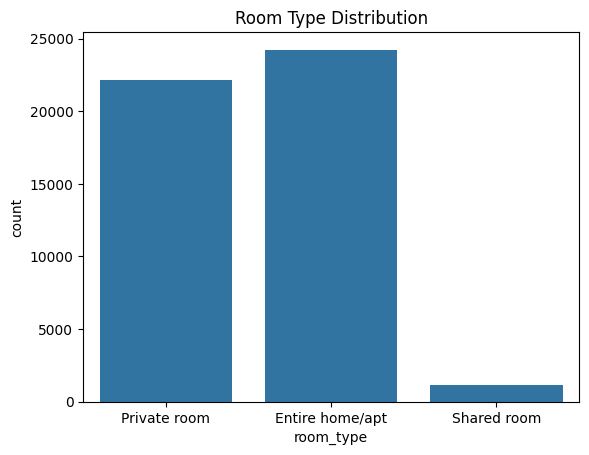

In [ ]:
sns.countplot(x="room_type", data=df)
plt.title("Room Type Distribution")
plt.show()


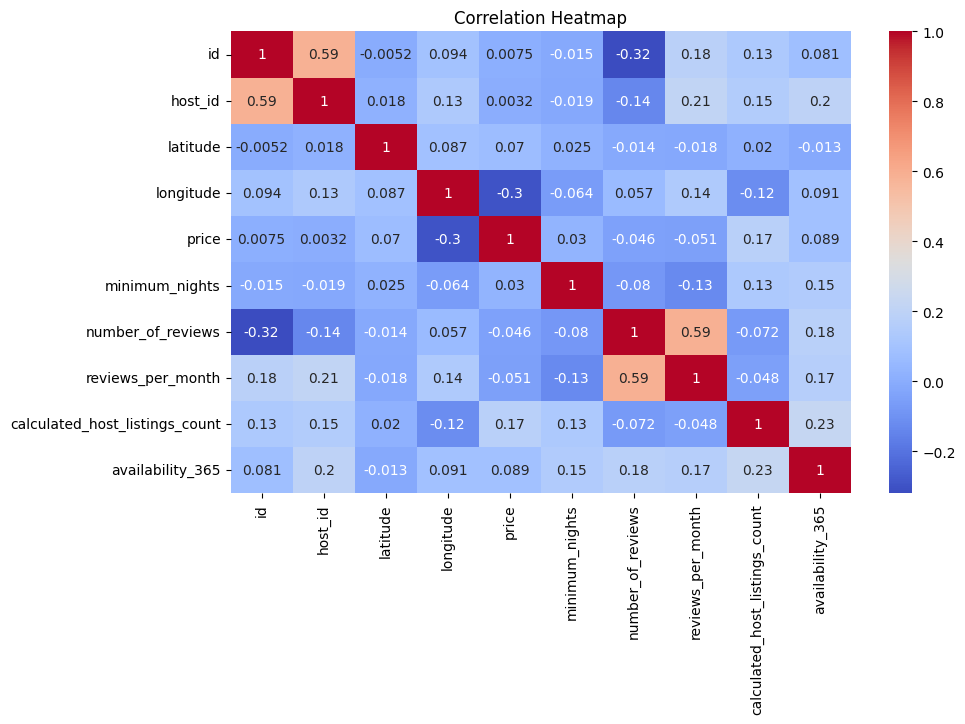

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


DATA LINK 2

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving CA_category_id.json to CA_category_id.json


In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
import json

with open("/content/CA_category_id.json", "r") as f:
    categories = json.load(f)

cat_df = pd.json_normalize(categories['items'])

# The 'df' DataFrame (Airbnb data) does not contain a 'category_id' column.
# Therefore, the following lines attempting to access or merge based on 'category_id' in 'df' will cause a KeyError.
# If the intention was to work with the YouTube category data, 'cat_df' is the relevant DataFrame.
# If you intended to merge the Airbnb data with other category information, please ensure a common column exists.
# For now, let's just display the head of the loaded category data.
# df['category_id'] = df['category_id'].astype(str) # This line caused the error
cat_df['id'] = cat_df['id'].astype(str)

# df = df.merge(cat_df[['id','snippet.title']], left_on='category_id', right_on='id', how='left') # This merge is problematic
# df.rename(columns={'snippet.title':'category'}, inplace=True)
cat_df.head()

,kind,etag,id,snippet.channelId,snippet.title,snippet.assignable
0,youtube#videoCategory,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/Xy1mB4_yLrHy_BmKm...",1,UCBR8-60-B28hp2BmDPdntcQ,Film & Animation,True
1,youtube#videoCategory,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/UZ1oLIIz2dxIhO45Z...",2,UCBR8-60-B28hp2BmDPdntcQ,Autos & Vehicles,True
2,youtube#videoCategory,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/nqRIq97-xe5XRZTxb...",10,UCBR8-60-B28hp2BmDPdntcQ,Music,True
3,youtube#videoCategory,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/HwXKamM1Q20q9BN-o...",15,UCBR8-60-B28hp2BmDPdntcQ,Pets & Animals,True
4,youtube#videoCategory,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/9GQMSRjrZdHeb1OEM...",17,UCBR8-60-B28hp2BmDPdntcQ,Sports,True


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 47525 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              47525 non-null  int64  
 1   name                            47525 non-null  object 
 2   host_id                         47525 non-null  int64  
 3   host_name                       47525 non-null  object 
 4   neighbourhood_group             47525 non-null  object 
 5   neighbourhood                   47525 non-null  object 
 6   latitude                        47525 non-null  float64
 7   longitude                       47525 non-null  float64
 8   room_type                       47525 non-null  object 
 9   price                           47525 non-null  int64  
 10  minimum_nights                  47525 non-null  int64  
 11  number_of_reviews               47525 non-null  int64  
 12  last_review                     37999

In [ ]:
df.isnull().sum()


,0
id,0
name,0
host_id,0
host_name,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [ ]:
# df['description'] = df['description'].fillna("No Description Provided") # Column does not exist
# df['tags'] = df['tags'].fillna("No Tags") # Column does not exist

In [ ]:
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())


In [ ]:
print("Duplicates:", df.duplicated().sum())
df = df.drop_duplicates()


Duplicates: 0


In [ ]:
# df['trending_date'] = pd.to_datetime(df['trending_date'], errors='coerce') # Column does not exist
# df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce') # Column does not exist

In [ ]:
# df['publish_month'] = df['publish_time'].dt.month # Column does not exist
# df['publish_hour'] = df['publish_time'].dt.hour # Column does not exist
# df['publish_weekday'] = df['publish_time'].dt.weekday # Column does not exist

In [ ]:
# sns.boxplot(x=df['views']) # 'views' column does not exist in df
# plt.title("Views Outlier Plot")
# plt.show()

In [ ]:
# df = df[(np.abs(zscore(df['views'])) < 3)] # Column does not exist in the current DataFrame

In [ ]:
plt.figure(figsize=(12,5))
# cat_views = df.groupby('category')['views'].mean().sort_values(ascending=False) # 'category' and 'views' columns do not exist in df
# sns.barplot(x=cat_views.index, y=cat_views.values)
# plt.xticks(rotation=90)
# plt.title("Average Views by Category")
# plt.show()

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

In [ ]:
# sns.scatterplot(x=df['views'], y=df['likes']) # 'views' and 'likes' columns do not exist in df
# plt.title("Views vs Likes")
# plt.show()

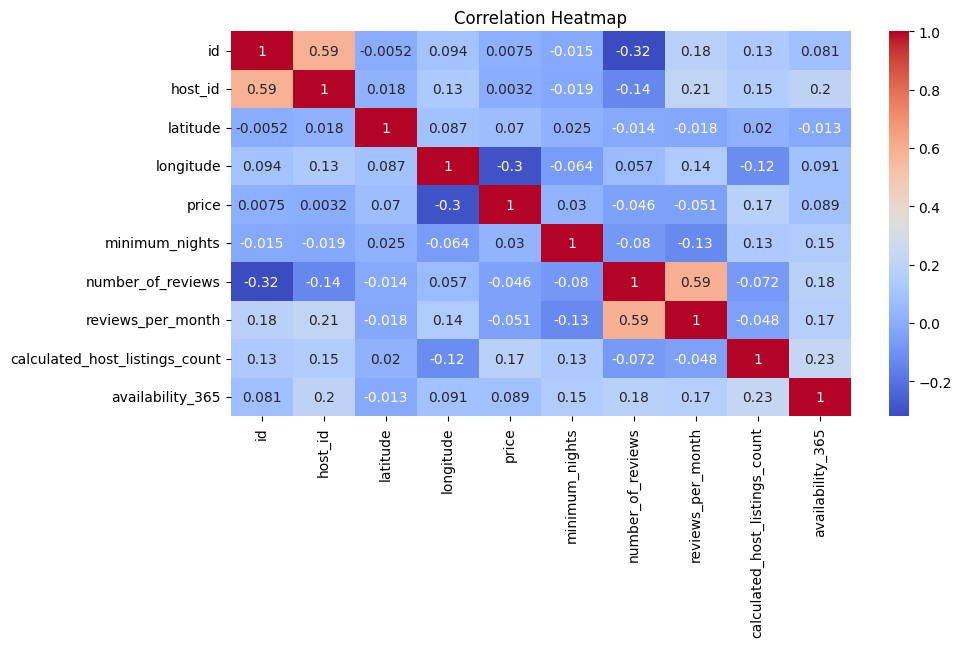

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
